In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<h1>Feature Engineering<h1/>

In [2]:
df = pd.read_csv('/kaggle/input/water-potability/water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


**Handle the null value**

In [4]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
df['ph'] = df['ph'].fillna(df.groupby(['Potability'])['ph'].transform('mean'))
df['Sulfate'] = df['Sulfate'].fillna(df.groupby(['Potability'])['Sulfate'].transform('mean'))
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df.groupby(['Potability'])['Trihalomethanes'].transform('mean'))

In [6]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.085378,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,334.564290,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,334.564290,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080855,196.369496,22014.092526,7.122277,333.785123,426.205111,14.284970,66.395671,3.966786,0.390110
std,1.469958,32.879761,8768.570828,1.583085,36.145701,80.824064,3.308162,15.769901,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.085378,196.967627,20927.833607,7.130299,334.564290,421.884968,14.218338,66.303555,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [9]:
df.groupby('Potability').sum()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,14156.586115,393073.117785,4.351143e+07,14170.164778,668459.450578,852607.446223,28699.941889,132474.503436,7923.667939
1,9040.295051,250233.351168,2.860674e+07,9162.413998,425020.613519,543640.496373,18097.620642,85037.715821,5071.523554


In [10]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.085378,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,334.564290,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,334.564290,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [11]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [12]:
df_corr = df.corr()
df_corr

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075878,-0.081887,-0.031827,0.014785,0.017205,0.040092,0.003009,-0.036211,-0.003848
Hardness,0.075878,1.000000,-0.046899,-0.030054,-0.092718,-0.023915,0.003610,-0.012718,-0.014449,-0.013837
Solids,-0.081887,-0.046899,1.000000,-0.070148,-0.149809,0.013831,0.010242,-0.008849,0.019546,0.033743
Chloramines,-0.031827,-0.030054,-0.070148,1.000000,0.023490,-0.020486,-0.012653,0.016615,0.002363,0.023779
Sulfate,0.014785,-0.092718,-0.149809,0.023490,1.000000,-0.014196,0.027403,-0.025797,-0.009523,-0.026957
Conductivity,0.017205,-0.023915,0.013831,-0.020486,-0.014196,1.000000,0.020966,0.001238,0.005798,-0.008128
Organic_carbon,0.040092,0.003610,0.010242,-0.012653,0.027403,0.020966,1.000000,-0.012944,-0.027308,-0.030001
Trihalomethanes,0.003009,-0.012718,-0.008849,0.016615,-0.025797,0.001238,-0.012944,1.000000,-0.021540,0.007305
Turbidity,-0.036211,-0.014449,0.019546,0.002363,-0.009523,0.005798,-0.027308,-0.021540,1.000000,0.001581
Potability,-0.003848,-0.013837,0.033743,0.023779,-0.026957,-0.008128,-0.030001,0.007305,0.001581,1.000000


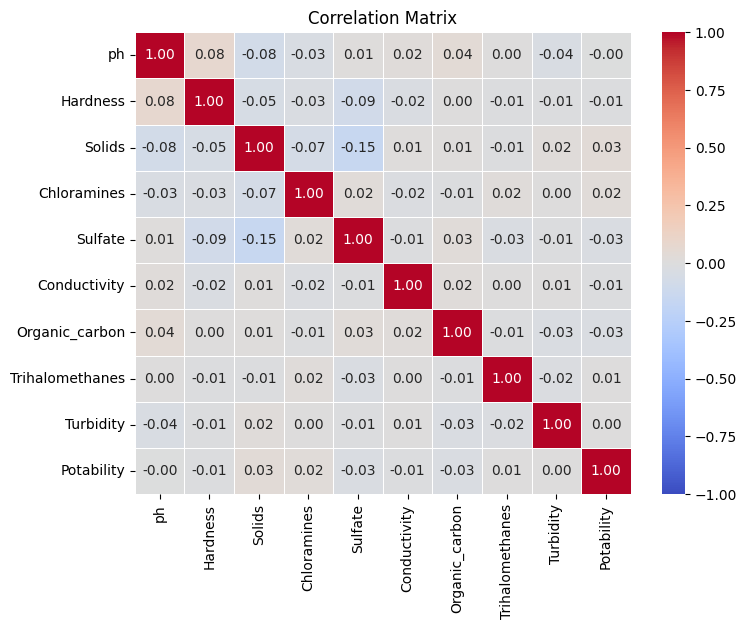

In [13]:
# Create a heatmap
plt.figure(figsize=(8, 6))  # Adjust the size as needed
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [14]:
# Count occurrences of each value in the 'Potability' column
potability_counts = df['Potability'].value_counts()
print(potability_counts)

Potability
0    1998
1    1278
Name: count, dtype: int64


<Axes: ylabel='count'>

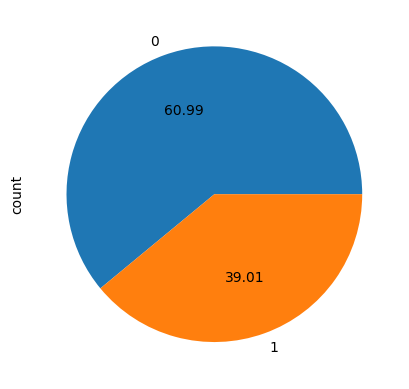

In [15]:
df.Potability.value_counts().plot.pie(autopct='%.2f')

**Now my data pretty good now proced to the machine learing part**

<h1>Machine Learing<h1/>

In [16]:
X=df.drop(['Potability'], axis=1)
y=df['Potability']

In [17]:
#handling imbalance in data and Scaling
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
samp = SMOTE()
X=df.drop(['Potability'], axis=1)
y=df['Potability']
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train, y_train =samp.fit_resample(X_train,y_train)

scale = MinMaxScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

In [41]:
potability_counts = y_train.value_counts()
print(potability_counts)

Potability
0    1488
1    1488
Name: count, dtype: int64


<Axes: ylabel='count'>

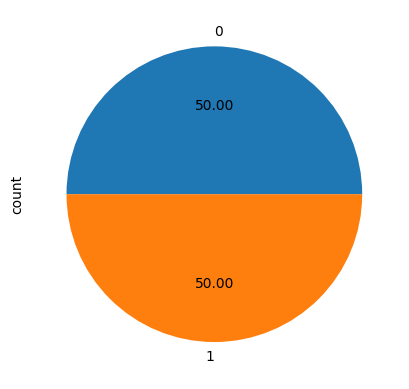

In [42]:
potability_counts.plot.pie(autopct='%.2f')

In [20]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [26]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params': {
            'C': [1, 10, 20],
            'kernel': ['rbf']
        }
    },
    'knn': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [1, 5, 10, 15, 20, 30]
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1, 10, 20, 30, 40, 50, 60, 70, 90, 100, 101, 120, 130, 140,150, 160, 170, 180, 190, 200, 210, 220, 230, 250]
        },
    },
    'l_g': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'C': [1, 5, 10],
        }
    },
    'GussNB': {
        'model': GaussianNB(),
        'params': {}
    },
    'mul_NB': {
        'model': MultinomialNB(),
        'params': {}
    },
    'dtc': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            'splitter': ['best', 'random']
        }
    },
    'gradient_boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [50, 100, 150],
        }
    }
}

In [27]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_names,mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_names,
        'best_score': clf.best_score_,
        'best_params':clf.best_params_
    })
df2 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df2


,model,best_score,best_params
0,svm,0.524862,"{'C': 20, 'kernel': 'rbf'}"
1,knn,0.684821,{'n_neighbors': 1}
2,random_forest,0.793013,{'n_estimators': 230}
3,l_g,0.491594,{'C': 1}
4,GussNB,0.532250,{}
5,mul_NB,0.487559,{}
6,dtc,0.729159,"{'criterion': 'entropy', 'splitter': 'best'}"
7,gradient_boosting,0.758399,{'n_estimators': 150}


In [28]:
from sklearn.preprocessing import StandardScaler
scale1 = StandardScaler()
X_train1=scale.fit_transform(X_train)
X_test1=scale.transform(X_test)

In [29]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_names,mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(X_train1, y_train)
    scores.append({
        'model': model_names,
        'best_score': clf.best_score_,
        'best_params':clf.best_params_
    })
df2 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df2

,model,best_score,best_params
0,svm,0.524862,"{'C': 20, 'kernel': 'rbf'}"
1,knn,0.684821,{'n_neighbors': 1}
2,random_forest,0.796037,{'n_estimators': 130}
3,l_g,0.491594,{'C': 1}
4,GussNB,0.532250,{}
5,mul_NB,0.487559,{}
6,dtc,0.736217,"{'criterion': 'entropy', 'splitter': 'best'}"
7,gradient_boosting,0.758736,{'n_estimators': 150}


**From above random forest algorithm give that best accuracy then other**

**After Using StandardScaler and MinMaxScaler, StandardScaler give best solution**

In [33]:
import pickle

In [30]:
random_forest = RandomForestClassifier(n_estimators=120)
random_forest.fit(X_train1,y_train)

RandomForestClassifier(n_estimators=120)

In [38]:
y_pred = random_forest.predict(X_test1)

In [39]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.80      0.81       510
           1       0.69      0.72      0.70       309

    accuracy                           0.77       819
   macro avg       0.76      0.76      0.76       819
weighted avg       0.77      0.77      0.77       819



In [31]:
# Correctly formatted input data
input_data = '5.324941855611651,280.08965491445105,35344.658047005905,13.043806107761025,180.20674636482346,392.42149580418476,10.50481954758385,55.084667854857926,4.427137925692965'

# Convert the input string into a NumPy array
input_values = [float(val) for val in input_data.split(',')]
input_data_as_numpy_array = np.asarray(input_values)

# Reshape the array
input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

# Now you can make predictions
prediction = random_forest.predict(input_data_reshape)
print(prediction)

if prediction[0] == 1:
    print("The water is drinkable")
else:
    print("The water is not drinkable")

[0]
The water is not drinkable


In [34]:
filename = 'trained_model.sav'
pickle.dump(random_forest,open(filename,'wb'))

In [35]:
filename = 'final_model.pkl'
pickle.dump(random_forest,open(filename,'wb'))

In [45]:
import pandas as pd
import numpy as np
import sklearn

print("pandas version:", pd.__version__)
print("numpy version:", np.__version__)
print("scikit-learn version:", sklearn.__version__)

pandas version: 2.2.2
numpy version: 1.26.4
scikit-learn version: 1.2.2
